# Access Data

This module is based on Pandas to access the data as a `DataFrame` object. 

#### Basic import

In [1]:
%matplotlib inline
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import snfanalysis as snf
import pandas as pd

## Analysis_Frame, the base object for the snf analysis

The snfanalysis.io module contains several function and enable to access the various snf data. Two are directly accessible from the snf module:
* analysis_dataframe()
* get_source()

The first is the one to use to get the high level DataFrame we are going to use, while the second returns the  dictionary corresponding to a source of snf data. The dataframe is actually built using get_source().
A Preselection is made when requesting the dataframe. Shall an information be missing, you can retrive it using the get_sources().

In [3]:
analysis_frame = snf.analysis_dataframe()

It contains a lot of information, some from salt2 (e.g. salt2.Color), some from the phrenology (starting with phrenology) etc.

In [4]:
analysis_frame.columns

Index([    u'hubblizer.dmfit_corr', u'hubblizer.dmfit_corr.err',
           u'hubblizer.dmfit_orig', u'hubblizer.dmfit_orig.err',
                      u'host.zcmb',              u'host.zhelio',
                u'host.zhelio.err',           u'idr.saltprefix',
                     u'idr.subset',              u'salt2.Color',
       ...
           u'phrenology.RSiII5972', u'phrenology.RSiII5972.err',
           u'phrenology.RSiII6355', u'phrenology.RSiII6355.err',
                u'phrenology.RSiS',      u'phrenology.RSiS.err',
               u'phrenology.RSiSS',     u'phrenology.RSiSS.err',
                u'phrenology.Rsjb',      u'phrenology.Rsjb.err'],
      dtype='object', length=110)

Let's do the basic Bailey Ratio plot right from the box

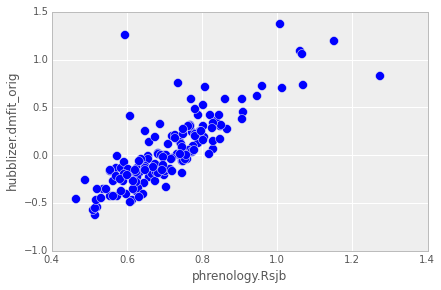

In [48]:
import matplotlib
matplotlib.style.use('grayscale')
pl = analysis_frame.plot.scatter(x="phrenology.Rsjb",y="hubblizer.dmfit_orig",s=80)

## Create a new Columns: the local specific star formation rate

Some of the host parameters are not in the table yet, e.g., the local ssfr. In few lines we will build it.

First of All, we will clean the sfr entry to remove the that are way below the core of the distribution. These points have such a low value because there is not Halpha (fit converged somewhere close to 0) and the distance (flux-> lum) conversion moved them to extremely low values. We fix that in the sfr_clean entry setting all the values below `10**-6` to be `10**-6`.

In [8]:
# Creation of the new columns
analysis_frame['sfr_clean'] = analysis_frame['sfr'].apply(lambda x: 10**-6 if x<10**-6 else x)
analysis_frame['sfr_clean'].head()
print "Minimum value of the old and new sfr columns", analysis_frame['sfr'].min(),analysis_frame['sfr_clean'].min()

Minimum value of the old and new sfr columns 8.79740689374e-21 1e-06


In [9]:
# and let create the localssfr
analysis_frame['lssfr'] = np.log10(analysis_frame['sfr_clean'].astype("float")) - analysis_frame['localmass']

What is the distribution of observed `lssfr`?

In [10]:
lssfr = analysis_frame.get('lssfr')

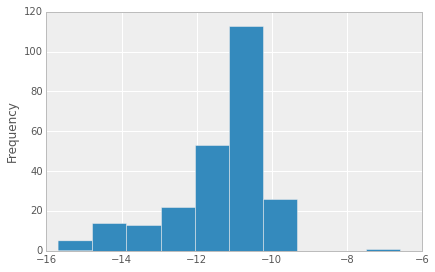

In [49]:
lssfr.plot.hist()

## Cleaning the analysis frame: build one on the good sample within a redshift range [0.023,0.08]

The mask() method of the DataFrame enables to set NaN to all rows that do not follow the columns criteria. 

**Remark** the masking condition are _this you do not want_

In [17]:
cleaned_frame = analysis_frame.mask(~(analysis_frame['idr.subset'].isin(["training","validation"])) | 
                                    (analysis_frame['host.zcmb']<0.023) | (analysis_frame['host.zcmb']>0.08))

In [19]:
cleaned_frame.head(5)

,hubblizer.dmfit_corr,hubblizer.dmfit_corr.err,hubblizer.dmfit_orig,hubblizer.dmfit_orig.err,host.zcmb,host.zhelio,host.zhelio.err,idr.saltprefix,idr.subset,salt2.Color,...,phrenology.RSiII6355,phrenology.RSiII6355.err,phrenology.RSiS,phrenology.RSiS.err,phrenology.RSiSS,phrenology.RSiSS.err,phrenology.Rsjb,phrenology.Rsjb.err,sfr_clean,lssfr
CSS110918_01,-0.0294581,0.762511,-0.622986,0.754786,0.0289397,0.03,0.01,salt2,validation,-0.146145,...,0.777881,0.0341189,1.55017,0.0166346,1.26427,0.00243123,0.514112,0,0.000207,NaN
CSS110918_02,-0.0108683,0.126627,-0.168042,0.0655631,0.038086,0.03935,6.7e-05,salt2,training,-0.0600834,...,0.871955,0.0122585,1.32374,0.0120686,1.12607,0.00345892,0.685166,0,0.000220,-10.8018
CSS120424_01,0.108515,0.128951,-0.24549,0.068091,0.037242,0.036298,0.000133,salt2,validation,-0.0720962,...,0.807929,0.0232854,1.46578,0.0113712,1.19282,0.00374131,0.618394,0,0.000306,-10.2191
CSS130502_01,0.20049,0.132244,-0.112965,0.0735518,0.0338079,0.0328,1e-05,salt2,training,-0.0952781,...,0.835131,0.00650982,1.35102,0.0107254,1.14286,0.00297783,0.688074,0,0.000511,-10.385
LSQ11bk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


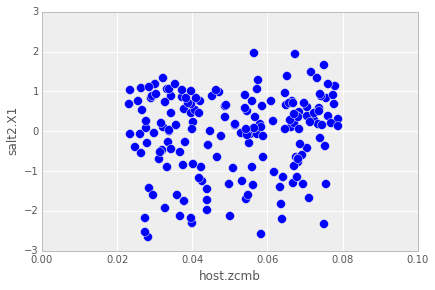

In [50]:
pl = cleaned_frame.plot.scatter(x="host.zcmb",y="salt2.X1",s=80)

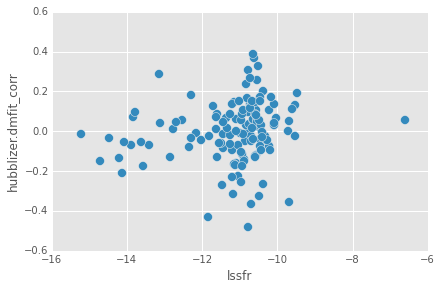

In [58]:
matplotlib.style.use('ggplot')
pl = cleaned_frame.plot(x="lssfr",y="hubblizer.dmfit_corr",s=80, kind="scatter")

In [44]:
analysis_frame.loc["SNF20060911-014"][['lssfr',"hubblizer.dmfit_corr","localmass","sfr"]]

lssfr                     -11.1204
hubblizer.dmfit_corr     0.0843709
localmass                  8.13917
sfr                     0.00104409
Name: SNF20060911-014, dtype: object